In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav
from scipy.signal import find_peaks
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle
import math
from matplotlib import cm
from astropy.wcs import WCS
import scipy
import scipy.ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import pkg_resources
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling import models
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from __future__ import print_function
import pyspeckit
import pylab as pl

In [2]:
path = 'GlobB_CCH_32.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
print(header)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  300                                                  NAXIS2  =                  300                                                  NAXIS3  =                   15                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   3.022701037487E-04                                                  BMIN    =   2.337535738562E-04                                                  BPA     =   8.455099661862E+01          

In [3]:
path = 'GlobB_HC3N.image.pbcor.fits'
cube = fits.open(path)
header = cube[0].header
read = SpectralCube.read(cube)
cube.close()

#print(read)

#read[28, :, :].quicklook()
#read[:, 300, 300].quicklook()

_, ra, _ = read.world[0, :, 0]
_, _, dec = read.world[0, 0, :]
freq, _, _ = read.world[:, 0, 0]

freq_ghz = freq/1e9
#print(freq_ghz)

freq_inc = freq_ghz[1]-freq_ghz[0]

velocity = 3e8*(-(freq/header["RESTFRQ"]))/1000
print('List of Velocities (km/s):')
#print(header["RESTFRQ"])
print(velocity)
print(header["RESTFRQ"]/1e9)

#For some reason, the numbers I am getting the wrong values when I leave the '+1' in the equation, so I left it out
vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
print('Space Between Velocity Channels (km/s):')
print(vel_inc)

#This is just me verifying my answer with the actual difference in velocities
vel_dif = velocity[2]-velocity[1]

ra_range = [337.433, 337.428] * u.deg 
dec_range = [-20.818, -20.814] * u.deg

sub_cube = read.subcube(xlo=ra_range[0], xhi=ra_range[1], ylo=dec_range[0], yhi=dec_range[1])

#print(sub_cube)

sub_cube_slab = sub_cube.spectral_slab(8863380600000. *u.Hz, 88639400000. *u.Hz)

#print(sub_cube_slab)

#I have to figure out how to convert the Hz to velocity (km/s)

moment_0 = sub_cube_slab.moment(order=0)
moment_1 = sub_cube_slab.moment(order=1)

#print(moment_1.wcs)

#fig = plt.figure(figsize=(18, 12))
#ax = fig.add_subplot(111, projection=moment_1.wcs)

# Display the moment map image
#im = ax.imshow(moment_1.hdu.data, cmap='RdBu_r', vmin=90.66846238e9, vmax=90.6690394e9)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
#ax.set_xlabel("Galactic Longitude (degrees)", fontsize=16)
#ax.set_ylabel("Galactic Latitude (degrees)", fontsize=16)

# Add a colorbar
#cbar = plt.colorbar(im, pad=.07)
#cbar.set_label('Velocity (km/s)', size=16)

Cube is a Stokes cube, returning spectral cube for I component


List of Velocities (km/s):
[-300030.02076843 -300029.17518345 -300028.32959847 -300027.48401349
 -300026.63842851 -300025.79284353 -300024.94725855 -300024.10167357
 -300023.25608858 -300022.4105036  -300021.56491862 -300020.71933364
 -300019.87374866 -300019.02816368 -300018.1825787  -300017.33699371
 -300016.49140873 -300015.64582375 -300014.80023877 -300013.95465379
 -300013.10906881 -300012.26348383 -300011.41789884 -300010.57231386
 -300009.72672888] Hz
100.076392
Space Between Velocity Channels (km/s):
0.8455849813492476


(1, 50, 600, 600)


TypeError: Invalid shape (1, 50, 600, 600) for image data

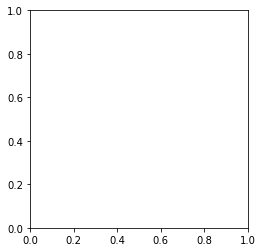

In [188]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('GlobB_HCN.image.pbcor.fits')

path = 'GlobB_HCN.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
#print(header)
print(data.shape)

hdu = fits.open(filename)[0]
#print(hdu.header)
wcs = WCS(hdu.header)

#plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [5]:
print('Axis 1 is {:8s}'.format(header["CTYPE1"]))
print('Axis 2 is {:8s}'.format(header["CTYPE2"]))
print('Axis 3 is {:8s}'.format(header["CTYPE3"]))

Axis 1 is RA---SIN
Axis 2 is DEC--SIN
Axis 3 is FREQ    


In [6]:
path = 'GlobC_CCH.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
print(header["BMAJ"])
print(header["BMIN"])

0.0004437585675864
0.0003377944143486


In [7]:
#This is in frequency not velocity
freq_start_ghz = header["CRVAL3"]/1e9
freq_inc_ghz = header["CDELT3"]/1e9

freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]

print(freq_start, freq_inc, header["RESTFRQ"])

channels = np.arange(header["NAXIS3"])

#define velocity as km/s blocks
frequency = freq_start + (freq_inc * channels)
frequency = np.array(frequency, dtype = float)

frequency_ghz = freq_start_ghz + (freq_inc_ghz * channels)
frequency_ghz = np.array(frequency_ghz, dtype = float)

print('Space Between Frequency Channels (MHz):')
print(freq_inc_ghz*1e3)

print('Space Between Frequency Channels (GHz):')
print(freq_inc_ghz)

print('List of Frequencies (GHz):')
print(frequency)

87340236872.18 -140987.6533203 87328585000.0
Space Between Frequency Channels (MHz):
-0.1409876533203
Space Between Frequency Channels (GHz):
-0.0001409876533203
List of Frequencies (GHz):
[8.73402369e+10 8.73400959e+10 8.73399549e+10 8.73398139e+10
 8.73396729e+10 8.73395319e+10 8.73393909e+10 8.73392500e+10
 8.73391090e+10 8.73389680e+10 8.73388270e+10 8.73386860e+10
 8.73385450e+10 8.73384040e+10 8.73382630e+10 8.73381221e+10
 8.73379811e+10 8.73378401e+10 8.73376991e+10 8.73375581e+10
 8.73374171e+10 8.73372761e+10 8.73371351e+10 8.73369942e+10
 8.73368532e+10 8.73367122e+10 8.73365712e+10 8.73364302e+10
 8.73362892e+10 8.73361482e+10 8.73360072e+10 8.73358663e+10
 8.73357253e+10 8.73355843e+10 8.73354433e+10 8.73353023e+10
 8.73351613e+10 8.73350203e+10 8.73348793e+10 8.73347384e+10]


In [8]:
#Here I wanted to convert the frequencies from above into velocities in km/s
#I used the equation nu=nu[rest](1-v/c) to get these calculations
velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
print('List of Velocities (km/s):')
print(header["RESTFRQ"])

#For some reason, the numbers I am getting the wrong values when I leave the '+1' in the equation, so I left it out
vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
print('Space Between Velocity Channels (km/s):')
print(vel_inc)

#This is just me verifying my answer with the actual difference in velocities
vel_dif = velocity[2]-velocity[1]
print(velocity)

List of Velocities (km/s):
87328585000.0
Space Between Velocity Channels (km/s):
0.4843350661881216
[-40.02769144 -39.54335637 -39.0590213  -38.57468624 -38.09035117
 -37.60601611 -37.12168104 -36.63734597 -36.15301091 -35.66867584
 -35.18434078 -34.70000571 -34.21567064 -33.73133558 -33.24700051
 -32.76266544 -32.27833038 -31.79399531 -31.30966025 -30.82532518
 -30.34099011 -29.85665505 -29.37231998 -28.88798491 -28.40364985
 -27.91931478 -27.43497972 -26.95064465 -26.46630958 -25.98197452
 -25.49763945 -25.01330439 -24.52896932 -24.04463425 -23.56029919
 -23.07596412 -22.59162905 -22.10729399 -21.62295892 -21.13862386]


In [12]:
#I am going to try defining all of the bounds outside of the function first so that the region is defined by a smaller area
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

print(ra_start)
channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1
print(channels)

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)

extent=[ra[0],ra[-1],dec[0],dec[-1]]

#print(header["CRVAL1"]) #center of image in degrees
#print(header["CDELT1"]) #degrees per pixel
#print(header["CRPIX1"])
#print(ra_start)
#print(ra_inc)
#print(channels)
#print(ra)

337.407684391
[-300. -299. -298. -297. -296. -295. -294. -293. -292. -291. -290. -289.
 -288. -287. -286. -285. -284. -283. -282. -281. -280. -279. -278. -277.
 -276. -275. -274. -273. -272. -271. -270. -269. -268. -267. -266. -265.
 -264. -263. -262. -261. -260. -259. -258. -257. -256. -255. -254. -253.
 -252. -251. -250. -249. -248. -247. -246. -245. -244. -243. -242. -241.
 -240. -239. -238. -237. -236. -235. -234. -233. -232. -231. -230. -229.
 -228. -227. -226. -225. -224. -223. -222. -221. -220. -219. -218. -217.
 -216. -215. -214. -213. -212. -211. -210. -209. -208. -207. -206. -205.
 -204. -203. -202. -201. -200. -199. -198. -197. -196. -195. -194. -193.
 -192. -191. -190. -189. -188. -187. -186. -185. -184. -183. -182. -181.
 -180. -179. -178. -177. -176. -175. -174. -173. -172. -171. -170. -169.
 -168. -167. -166. -165. -164. -163. -162. -161. -160. -159. -158. -157.
 -156. -155. -154. -153. -152. -151. -150. -149. -148. -147. -146. -145.
 -144. -143. -142. -141. -140. -139. 

In [9]:
def find_maxpixel(source = 'GlobB_12CO'):
    
    a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    #print(len(a))
    
    integrated = np.sum(data[:, :, :], axis = 0)
    max_val = np.nanmax(integrated)
    print(max_val)
    
    array = []
    for i in range(len(a)):
        if np.nanmax(data1[a[i], :, :]) > 0.8*max_val:
            array.append(a[i])
            
    #print(array)
        
    print('# of velocity channels included:')
    print(len(a))
    #print('First velocity channel included:')
    #print(array.index(maxpixel < max_val))
    print('Actual array- Just ignore:')
    print(array)
    
    #Will probably put this function in a different place so that I can have the max value and the percentage of 
    #that defined before going into this one
    #The value I have right now is 10% of the highest intensity

In [10]:
find_maxpixel(source = 'GlobB_HNC')

0.12859014
# of velocity channels included:
15
Actual array- Just ignore:
[]


# This function is to check individual channels without masks

In [18]:
def integrated_intensity(source = 'GlobC_HCN'):
    
    path = source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    
    data1 = data[0,:,:,:]

    plt.figure(figsize=[10,10])
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    array = [11, 12, 13, 14, 15, 16, 17]

    integrated1 = np.sum(data1[array, :, :], axis = 0) 
    extent=[ra[0],ra[-1],dec[0],dec[-1]]
    print(integrated1.shape)
    
    #sigma_mask = sigma_clip(integrated1, sigma=2, maxiters=None, cenfunc='mean')
    #newmask = (integrated1 < np.amax(sigma_mask))
    
    #mom0 = np.ma.array(integrated1, mask = newmask)*abs(vel_inc)
    
    plt.imshow(integrated1, origin = 'lower', extent=extent)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('RA',fontsize=14)
    plt.ylabel('DEC',fontsize=14)
    plt.colorbar(label = r'Integrated Instensity (Jy/Beam km/s)', fraction=0.048, pad=0.04)
    plt.title(source + ' Integrated Intensity', fontsize= 20)
    plt.show()

In [19]:
integrated_intensity(source = 'GlobB_12CO')

(250, 250)


# Below is the function that I am using for Moment 0

In [2]:
def moment0(globule = 'GlobB', source = '13CO'):
   
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    
    data1 = data[0,:,:,:]
    
    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    v_channels = np.arange(header["NAXIS3"])

    #define velocity as km/s blocks
    frequency = freq_start + (freq_inc * v_channels)
    frequency = np.array(frequency, dtype = float)
    
    velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000

    vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
    #print(vel_inc)
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)    
    
    if globule == 'GlobB':
        figure = plt.figure(figsize=[9,8])
        if source == 'HNC_32':
            x1 = round(header["CRPIX1"]-(ra_start-337.4325)/ra_inc)-1
            x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
            y1 = round(header["CRPIX2"]-(20.818+dec_start)/dec_inc)-2
            y2 = round(header["CRPIX2"]-(20.81354+dec_start)/dec_inc)-2
        else:
            x1 = round(header["CRPIX1"]-(ra_start-337.434)/ra_inc)-1
            x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
            y1 = round(header["CRPIX2"]-(20.818+dec_start)/dec_inc)-2
            y2 = round(header["CRPIX2"]-(20.811+dec_start)/dec_inc)-2
    else:
        figure = plt.figure(figsize=[9, 8])
        x1 = round(header["CRPIX1"]-(ra_start-337.40975)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.40565)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.80087)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1
    
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]
    
    if source == '12CO':
        if globule == 'GlobB':
            d = 0.25
            array = [11, 12, 13, 14, 15, 16, 17]
        else:
            d = 0.07
    elif source == '13CO':
        if globule == 'GlobB':
            d = 0.25
            array = [11, 12, 13, 14, 15]
        else:
            d = 0.1
    elif source == 'C18O':
        if globule == 'GlobB':
            d = 0.28
            array = [11, 12, 13, 14]
        else:
            d = 0.15
    elif source == 'CCH':
        if globule == 'GlobB':
            d = 0.25
            array = [26, 27, 28, 29]
        else:
            d = 0.15
            array = [25, 26]
    elif source == 'CCH_32':
        if globule == 'GlobB':
            d = 0.15
            array = [6, 7, 8]
        else:
            d = 0.08
            array = [37, 38]
    elif source == 'HC3N':
        if globule == 'GlobB':
            d = 0.3
            array = [15, 16]
        else:
            d = 0.25
            array = [14, 15]
    elif source == 'HCN':
        if globule == 'GlobB':
            d = 0.06
            array = [26, 27, 28, 29, 30]
        else:
            d = 0.08
            array = [25, 26]
    elif source == 'HCN_32':
        if globule == 'GlobB':
            d = 0.065
            array = [11, 12, 13, 14, 15, 16, 17]
        else:
            d = 0.04
            array = [36, 37, 38, 39]
    elif source == 'HCOp':
        if globule == 'GlobB':
            d = 0.08
            array = [26, 27, 28, 29, 30]
        else:
            d = 0.1
            array = [25, 26]
    elif source == 'HCOp_32':
        if globule == 'GlobB':
            d = 0.1
            array = [13, 14, 15, 16, 17, 18]
        else:
            d = 0.08
            array = [37, 38, 39, 40]
    elif source == 'HNC':
        if globule == 'GlobB':
            d = 0.3
            array = [4, 5, 6, 7]
        else:
            d = 0.08
            array = [24, 25, 26, 27]
    elif source == 'HNC_32':
        if globule == 'GlobB':
            d = 0.2
            array = [14, 15, 16, 17, 18]
        else:
            d = 0.12
            array = [37, 38, 39]
    
    integrated = np.sum(data3[:, :, :], axis = 0)
    
    moment0 = np.sum(data3[array, :, :], axis = 0)
    
    max_value = np.nanmax(moment0)
    
    mom0 = np.ma.array(moment0)*abs(vel_inc)
    maximum = np.nanmax(mom0)
    
    extent=[ra[x1],ra[x2],dec[y1],dec[y2]]

    ax = figure.add_subplot(1, 1, 1)
    bmaj = header['BMAJ']#major beam width
    #print(bmaj)
    bmin = header['BMIN'] #minor beam width
    #print(bmin)
    bpa = header['BPA']
    beam = Ellipse(xy=(ra[x1 + 10], dec[y1 + 25]), width=bmaj, height=bmin, angle=bpa, color = 'white', zorder = 1)
    ax.add_artist(beam)
    #print(ra[40], dec[40])
    #print(np.nanmax(mom0))
    
    print(source, np.nansum(mom0))
    print(np.nanmax(mom0))
    
    #Go through and figure out what all of the new coordinates should be.
    
    dec_val4 = np.abs(dec + 20.8138889).argmin()
    dec_val3 = np.abs(dec + 20.8152778).argmin()
    dec_val2 = np.abs(dec + 20.8166667).argmin()
    #dec_val1 = np.abs(dec + 20.8180556).argmin()
    #ax.set_yticks([dec[dec_val2], dec[dec_val3], dec[dec_val4]])
    #ax.set_yticklabels(['49′ 0″','55″','-20° 48′ 50″'], fontsize = 14)

    ra_val1 = np.abs(ra - 337.4325000).argmin()
    ra_val2 = np.abs(ra - 337.4312500).argmin()
    ra_val3 = np.abs(ra - 337.4300000).argmin()
    ra_val4 = np.abs(ra - 337.4287500).argmin()
    #ax.set_xticks([ra[ra_val1], ra[ra_val2], ra[ra_val3], ra[ra_val4]])
    #ax.set_xticklabels(['$\mathrm{22^{h}29^{m}43.8^{s}}$', '$\mathrm{43.5^{s}}$', '$\mathrm{43.2^{s}}$', 
                        #'$\mathrm{42.9^{s}}$'], fontsize = 14)
    
    cm = plt.cm.get_cmap('gist_heat')
    plt.imshow(mom0, origin= 'lower', cmap=cm, zorder = 0, aspect = 'auto', extent = extent)
    
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    #plt.set_facecolor("black")
    plt.xlabel('Right Ascension (deg)',fontsize=20)
    #plt.ylabel('DEC (deg)',fontsize=20)
    figure.text(-0.02, 0.5, 'Declination (deg)', fontsize=20, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
    figure.text(0.37, 0.15, 'Integrated Intensity (Jy/beam $km s^{-1}$)', fontsize=14, horizontalalignment='center', verticalalignment='center', rotation = 'horizontal', color = 'white')

    #br = Rectangle(xy = (ra[x1 + 8], dec[y1 + 11]), width = (ra[x1+36]-ra[x1]), height = (dec[y1+7]-dec[y1]), color = 'white')
    #ax.add_artist(br)
    cbaxes = figure.add_axes([0.198, 0.222, 0.3, 0.05], zorder = 4) 
    cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(20)
        t.set_color('white')
    plt.clim(0.0, maximum)
    
    #plt.savefig(globule + '_' + source + ' final.png', bbox_inches='tight')

In [3]:
#moment0(globule = 'GlobB', source = '12CO')
#moment0(globule = 'GlobB', source = '13CO')
#moment0(globule = 'GlobB', source = 'C18O')
#moment0(globule = 'GlobB', source = 'CCH')
#moment0(globule = 'GlobB', source = 'CCH_32')
#moment0(globule = 'GlobB', source = 'HC3N')
moment0(globule = 'GlobB', source = 'HCN')
#moment0(globule = 'GlobB', source = 'HCN_32')
#moment0(globule = 'GlobB', source = 'HCOp')
#moment0(globule = 'GlobB', source = 'HCOp_32')
#moment0(globule = 'GlobB', source = 'HNC')
#moment0(globule = 'GlobB', source = 'HNC_32')

#moment0(globule = 'GlobC', source = 'CCH')
#moment0(globule = 'GlobC', source = 'CCH_32')
#moment0(globule = 'GlobC', source = 'HC3N')
#moment0(globule = 'GlobC', source = 'HCN')
#moment0(globule = 'GlobC', source = 'HCN_32')
#moment0(globule = 'GlobC', source = 'HCOp')
#moment0(globule = 'GlobC', source = 'HCOp_32')
#moment0(globule = 'GlobC', source = 'HNC')
#moment0(globule = 'GlobC', source = 'HNC_32')

HCN 60.32735
0.06596092


# Spectral Line of an entire cube

In [10]:
def plot_total_spectra(globule = 'GlobB', source = 'HCN'):
    
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    
    data1 = data[0,:,:,:]
    
    plt.figure(figsize=(6,8))
    
    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    freq_channels = np.arange(header["NAXIS3"])
    
    #define velocity as km/s blocks
    frequency = freq_start + (freq_inc * freq_channels)
    frequency = np.array(frequency, dtype = float)
    velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
    vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
    
    rng=range(len(velocity))
    print(rng)
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    if globule == 'GlobB':
        figure = plt.figure(figsize=[8, 7])
        x1 = round(header["CRPIX1"]-(ra_start-337.43248)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2
        y2 = round(header["CRPIX2"]-(dec_start+20.81354)/dec_inc)-2
    else:
        figure = plt.figure(figsize=[8, 7])
        x1 = round(header["CRPIX1"]-(ra_start-337.40975)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.40565)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.80087)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.7968)/dec_inc)-1
    
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]

    spectrum = []
    for i in rng:
        spectrum += [np.nansum(data1[i, :, :])]
        
    PIXVAL = spectrum

    #peaks, properties = find_peaks(PIXVAL, height = np.amax(np.array(PIXVAL))*.5, width = 0.5) #Requirements to identify peaks
    #prominences = properties["prominences"] #vertical distance between the peak and its lowest contour line
    #heights = properties["peak_heights"]
    #widths = properties["widths"] #width of a peak in samples
    #width_heights = properties["width_heights"]
    
    #for i in range(len(peaks)):
        #print('Peak '+str(i+1)+' Velocity: %1.2f km/s' %(np.array(velocity)[peaks][i]))
        #print('Peak '+str(i+1)+' Height: %1.2E' %(heights[i])+'(Jy/beam)')
    
    plt.plot(velocity, spectrum)
    
    #plt.title('Intensity Spectrum for ' + source, fontsize = 16)
    plt.xlabel('Velocity km/s')
    plt.ylabel('Intensity (K km/s)')
    plt.xticks()
    plt.yticks()
    #plt.legend()
    plt.grid()
    
    #plt.savefig(globule + source + ' Spectrum_May25.png')

range(0, 32)
range(0, 32)
range(0, 32)
range(0, 50)
range(0, 32)


<Figure size 432x576 with 0 Axes>

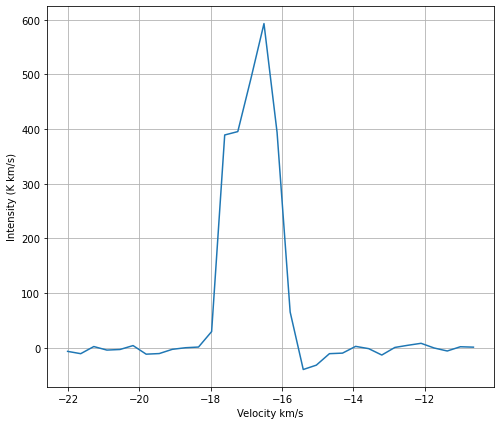

<Figure size 432x576 with 0 Axes>

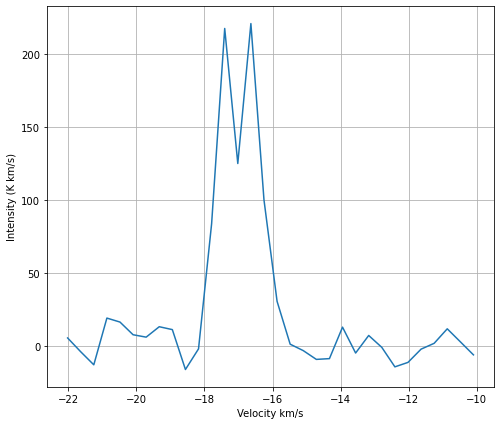

<Figure size 432x576 with 0 Axes>

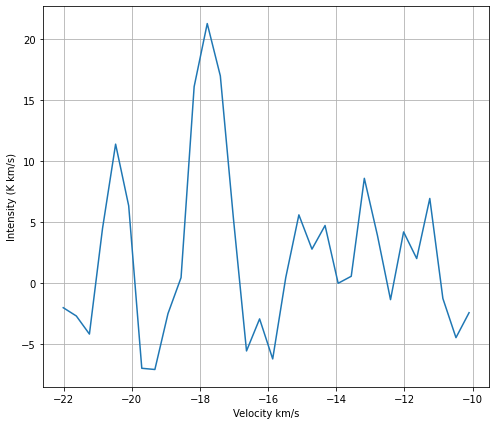

<Figure size 432x576 with 0 Axes>

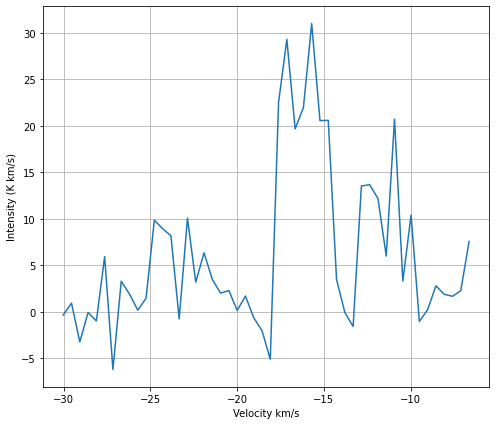

<Figure size 432x576 with 0 Axes>

In [11]:
plot_total_spectra(globule = 'GlobB', source = '12CO')
plot_total_spectra(globule = 'GlobB', source = '13CO')
plot_total_spectra(globule = 'GlobB', source = 'C18O')
#plot_total_spectra(globule = 'GlobB', source = 'CCH')
#plot_total_spectra(globule = 'GlobB', source = 'CCH_32')
#plot_total_spectra(globule = 'GlobB', source = 'HC3N')
plot_total_spectra(globule = 'GlobB', source = 'HCN')
plot_total_spectra(globule = 'GlobB', source = 'HCN_32')
#plot_total_spectra(globule = 'GlobB', source = 'HCOp')
#plot_total_spectra(globule = 'GlobB', source = 'HCOp_32')
#plot_total_spectra(globule = 'GlobB', source = 'HNC')
#plot_total_spectra(globule = 'GlobB', source = 'HNC_32')

#plot_total_spectra(globule = 'GlobC', source = 'CCH')
#plot_total_spectra(globule = 'GlobC', source = 'CCH_32')
#plot_total_spectra(globule = 'GlobC', source = 'HC3N')
#plot_total_spectra(globule = 'GlobC', source = 'HCN')
#plot_total_spectra(globule = 'GlobC', source = 'HCN_32')
#plot_total_spectra(globule = 'GlobC', source = 'HCOp')
#plot_total_spectra(globule = 'GlobC', source = 'HCOp_32')
#plot_total_spectra(globule = 'GlobC', source = 'HNC')
#plot_total_spectra(globule = 'GlobC', source = 'HNC_32')

# Moment 1 Maps

In [8]:
#This is the function that I am currently using for all of my imaging for moment 1 (6/8)
def moment1(globule = 'GlobB', source = 'GlobB_CCH_32'):
    
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
   
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    if globule == 'GlobB':
        figure = plt.figure(figsize=[8, 8])
        x1 = round(header["CRPIX1"]-(ra_start-337.43248)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2
        y2 = round(header["CRPIX2"]-(dec_start+20.81354)/dec_inc)-2
    else:
        figure = plt.figure(figsize=[8, 8])
        x1 = round(header["CRPIX1"]-(ra_start-337.40975)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.40565)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.80087)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1
    
    #x = round(header["CRPIX1"]-(ra_start-337.397532)/ra_inc)-1
    #y = round(header["CRPIX2"]-(dec_start+20.797204)/dec_inc)-1
    
    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    freq_channels = np.arange(header["NAXIS3"])
    
    #box = 30
    data1 = data[0,:,:,:]
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]
    
    integrated = np.sum(data3[:, :, :], axis = 0)
 
    max_val = np.nanmax(integrated)
    #print(max_val)
    
    if source == '12CO':
        if globule == 'GlobB':
            d = 0.25
            array = [11, 12, 13, 14, 15, 16, 17]
        else:
            d = 0.07
    elif source == '13CO':
        if globule == 'GlobB':
            d = 0.25
            array = [11, 12, 13, 14, 15]
        else:
            d = 0.1
    elif source == 'C18O':
        if globule == 'GlobB':
            d = 0.28
            array = [11, 12, 13, 14]
        else:
            d = 0.15
    elif source == 'CCH':
        if globule == 'GlobB':
            d = 0.25
            array = [26, 27, 28, 29]
        else:
            d = 0.15
            array = [25, 26]
    elif source == 'CCH_32':
        if globule == 'GlobB':
            d = 0.15
            array = [6, 7, 8]
        else:
            d = 0.08
            array = [37, 38]
    elif source == 'HC3N':
        if globule == 'GlobB':
            d = 0.3
            array = [15, 16]
        else:
            d = 0.25
            array = [14, 15]
    elif source == 'HCN':
        if globule == 'GlobB':
            d = 0.06
            array = [26, 27, 28, 29, 30]
        else:
            d = 0.08
            array = [25, 26]
    elif source == 'HCN_32':
        if globule == 'GlobB':
            d = 0.065
            array = [11, 12, 13, 14, 15, 16, 17]
        else:
            d = 0.04
            array = [36, 37, 38, 39]
    elif source == 'HCOp':
        if globule == 'GlobB':
            d = 0.08
            array = [26, 27, 28, 29, 30]
        else:
            d = 0.1
            array = [25, 26]
    elif source == 'HCOp_32':
        if globule == 'GlobB':
            d = 0.1
            array = [13, 14, 15, 16, 17, 18]
        else:
            d = 0.08
            array = [37, 38, 39, 40]
    elif source == 'HNC':
        if globule == 'GlobB':
            d = 0.3
            array = [4, 5, 6, 7]
        else:
            d = 0.08
            array = [24, 25, 26, 27]
    elif source == 'HNC_32':
        if globule == 'GlobB':
            d = 0.2
            array = [14, 15, 16, 17, 18]
        else:
            d = 0.12
            array = [37, 38, 39]
    
    #a = [x for x in range(len(data1[:, 0, 0]))]
    #array = []
    #for i in range(len(a)):
        #if np.nanmax(data3[a[i], :, :]) > d*max_val:
            #array.append(a[i])
    #print(array)
    #array = [6, 7, 8]
    moment0 = np.sum(data3[array,:,:], axis=0)
    
    #define velocity as km/s blocks
    frequency = freq_start + (freq_inc * freq_channels)
    frequency = np.array(frequency, dtype = float)
    velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
    
    #Go from Moment 0 to Moment 1
    intermediate = np.sum(data1[array,:,:] * velocity[array,np.newaxis,np.newaxis], axis=0)
    intermediate_x = intermediate[:, np.arange(x1, x2)]
    intermediate_y = intermediate_x[np.arange(y1, y2), :]
    moment1 = intermediate_y/moment0

    #Adding in the mask
    sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))
    #maskednoise = np.ma.masked_array(moment0, mask = newmask)
    
    mom1 = np.ma.array(moment1, mask=newmask)
    #print(mom1.shape)
    
    extent=[ra[x1],ra[x2],dec[y1],dec[y2]]
    #print(extent)

    # Show Plot
    if globule == 'GlobB':
        plt.imshow(mom1, origin='lower', cmap='Reds', extent = extent, aspect = 'auto')
        cbar = plt.colorbar(label= 'Velocity (km/s)', fraction=0.05, pad=0.04)
        plt.clim(-18, -16) #Globule B
    elif globule == 'GlobC':
        plt.imshow(mom1, origin='lower', cmap='Blues_r', extent = extent, aspect = 'auto')
        cbar = plt.colorbar(label= 'Velocity (km/s)', fraction=0.05, pad=0.04)
        plt.clim(-28.5, -27) #Globule C
       
    plt.xticks(fontsize = 20, rotation = 45)
    plt.yticks(fontsize = 20)
    #ax1.set_facecolor("black")
    plt.xlabel('RA (deg)',fontsize=20)
    plt.ylabel('DEC (deg)',fontsize=20)
    
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(20)
    #plt.title(source + ' Moment 1', fontsize=20)
    #plt.savefig(globule + source + ' AAS2.png', bbox_inches='tight')

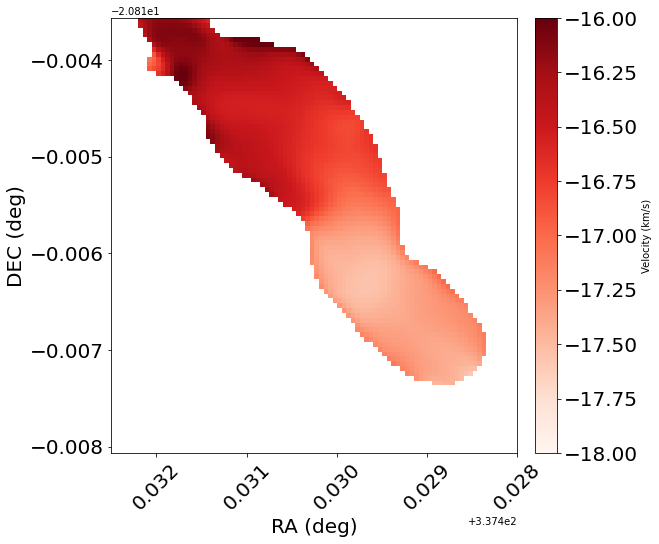

In [9]:
moment1(globule = 'GlobB', source = '12CO')
#moment1(globule = 'GlobB', source = '13CO')
#moment1(globule = 'GlobB', source = 'C18O')
#moment1(globule = 'GlobB', source = 'CCH')
#moment1(globule = 'GlobB', source = 'CCH_32')
#moment1(globule = 'GlobB', source = 'HC3N')
#moment1(globule = 'GlobB', source = 'HCN')
#moment1(globule = 'GlobB', source = 'HCN_32')
#moment1(globule = 'GlobB', source = 'HCOp')
#moment1(globule = 'GlobB', source = 'HCOp_32')
#moment1(globule = 'GlobB', source = 'HNC')
#moment1(globule = 'GlobB', source = 'HNC_32')

#moment1(globule = 'GlobC', source = 'CCH')
#moment1(globule = 'GlobC', source = 'CCH_32')
#moment1(globule = 'GlobC', source = 'HC3N')
#moment1(globule = 'GlobC', source = 'HCN')
#moment1(globule = 'GlobC', source = 'HCN_32')
#moment1(globule = 'GlobC', source = 'HCOp')
#moment1(globule = 'GlobC', source = 'HCOp_32')
#moment1(globule = 'GlobC', source = 'HNC')
#moment1(globule = 'GlobC', source = 'HNC_32')

# Individual Velocity Channel Maps

In [26]:
source = 'GlobB_HCN'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header

ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
    
x1 = round(header["CRPIX1"]-(ra_start-337.433)/ra_inc)-1 #Globule B
#x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1 #Globule C
#print(x1)
x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1 #Globule B
#x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 #Globule C
#print(x2)
y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2 #Globule B
#y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1 #Globule C
#print(y1)
y2 = round(header["CRPIX2"]-(dec_start+20.814)/dec_inc)-2 #Globule B
#y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1 #Globule C
#print(y2)
#x = round(header["CRPIX1"]-(ra_start-337.397532)/ra_inc)-1
#y = round(header["CRPIX2"]-(dec_start+20.797204)/dec_inc)-1
#box = 30
data1 = data[0,:,:,:]
data2 = data1[:, :, np.arange(x1, x2)]
data3 = data2[:, np.arange(y1, y2), :]
    
freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]

freq_channels = np.arange(header["NAXIS3"])
  
#data1 = data[0,:,:,:]
#data2 = data1[:, :, np.arange(x1, x2)]
#data3 = data2[:, np.arange(y1, y2), :]
    
integrated = np.sum(data3[:, :, :], axis = 0)
 
max_val = np.nanmax(integrated)
    
a = [x for x in range(len(data1[:, 0, 0]))]
array = []
for i in range(len(a)):
    if np.nanmax(data3[a[i], :, :]) > 0.08*max_val:
        array.append(a[i])
        
print(array)

if len(array) < 4:
    nrows = 1
    ncols = len(array)
elif 4 <= len(array)<8:
    nrows = 2
    ncols = round(len(array)/2)
else:
    nrows = 3
    ncols = round(len(array)/3)

# Creates MxN Grid for Tot CHANNELS
def setup_axes(fig):
    g = axes_grid.ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), ngrids=None, direction='row', axes_pad=0.01, add_all=True, share_all=True, aspect=True, label_mode='L', cbar_mode=None)
    ax = g[-1]
    cax = inset_axes(ax,
                     width="8%", # width = 10% of parent_bbox width
                     height="100%", # height : 50%
                     loc=3,
                     bbox_to_anchor=(1.01, 0, 1, 1),
                     bbox_transform=ax.transAxes,
                     borderpad=0.
                     )
    return g, cax

[11, 12, 13, 26, 27, 28, 29, 36, 37, 38]


This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


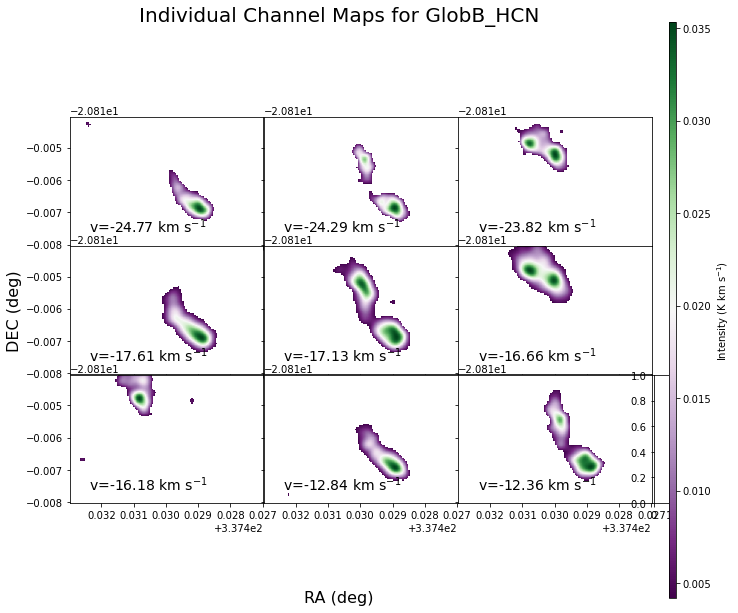

In [27]:
#This is for making the individual velocity channel maps and setting them all nicely next to each other (Part 2)
fig = plt.figure(1, figsize=(ncols*2+3, nrows*2+2))
g, cax = setup_axes(fig)
moment0 = np.sum(data3[array, :, :], axis = 0)

freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]

freq_channels = np.arange(header["NAXIS3"])
frequency = freq_start + (freq_inc * freq_channels)
frequency = np.array(frequency, dtype = float)
velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000

extent=[ra[x1],ra[x2],dec[y1],dec[y2]]

for i, ax in enumerate(g):
    vchan = array[i]
    channel = data3[vchan,:,:]
    sigma_mask = sigma_clip(channel, sigma=3, maxiters=None, cenfunc='mean')
    newmask = (channel < np.amax(sigma_mask))
    mom0 = np.ma.array(channel, mask = newmask)
    im = ax.imshow(mom0, origin="lower", cmap='PRGn', extent=extent)
    #plt.contour(mom0, levels=[0.5, max_val])
    ax.text(0.1, 0.1, 'v=%2.2f km s$^{-1}$' %(velocity[vchan]), transform=ax.transAxes, fontsize = 14)
    
fig.suptitle('Individual Channel Maps for ' + source, fontsize=20, y=1.01, horizontalalignment='center', verticalalignment='center')
fig.text(0.5, 0, 'RA (deg)',fontsize=16, horizontalalignment='center', verticalalignment='center')
fig.text(0, 0.5, 'DEC (deg)',fontsize=16, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')

plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.01, 0, 0.01, 1.0])
fig.colorbar(im, cax=cbar_ax, label = 'Intensity (K km s$^{-1}$)')
plt.show()

# First I am going to plot contours on the Moment 0 Map

In [28]:
def moment0c(source = 'GlobB_CCH_32'):
    
    path = source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    
    data1 = data[0,:,:,:]

    plt.figure(figsize=[10,20/3]) #Globule B
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    x1 = round(header["CRPIX1"]-(ra_start-337.434)/ra_inc)-1 #Globule B
    #x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1 #Globule C
    #print(x1)
    x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1 #Globule B
    #x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 #Globule C
    #print(x2)
    y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2 #Globule B
    #y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1 #Globule C
    #print(y1)
    y2 = round(header["CRPIX2"]-(dec_start+20.812)/dec_inc)-2 #Globule B
    #y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1 #Globule C
    #print(y2)
    
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]
    
    integrated = np.sum(data3[:, :, :], axis = 0)
 
    max_val = np.nanmax(integrated)
    #print(max_val)
    
    a = [x for x in range(len(data1[:, 0, 0]))]
    array = []
    for i in range(len(a)):
        if np.nanmax(data3[a[i], :, :]) > 0.25*max_val:
            array.append(a[i])
            
    #print(array)
    
    moment0 = np.sum(data3[array, :, :], axis = 0)
    
    max_value = np.nanmax(moment0)
    min_value = np.nanmin(moment0)
    
    extent=[ra[x1],ra[x2],dec[y1],dec[y2]]
    ra_x = np.linspace(ra[x2], ra[x1], np.abs(x1-x2))
    dec_y = np.linspace(dec[y1], dec[y2], (y2-y1))
    
    sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))
    
    mom0 = np.ma.array(moment0, mask = newmask)
    
    plt.contour(ra_x, dec_y, newmask, colors='k', origin = "lower", extent=extent)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('RA (deg)',fontsize=14)
    plt.ylabel('DEC (deg)',fontsize=14)
    plt.colorbar(label = r'Integrated Instensity ($\mathrm{K\,kms^{-1}}$)', fraction=0.048, pad=0.04)
    plt.title(source + ' Contours', fontsize= 20)
    plt.show()

Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less


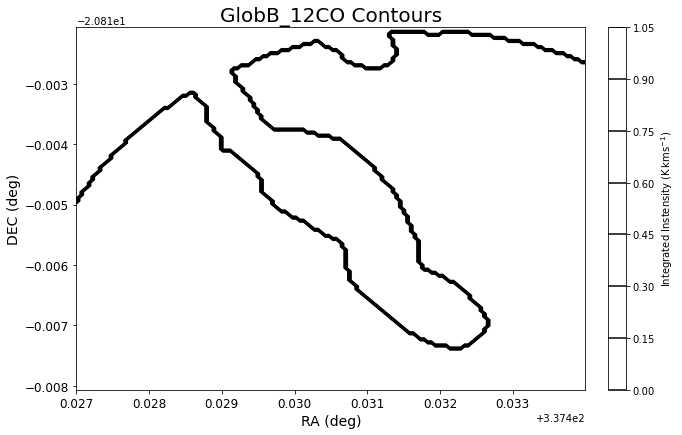

In [29]:
moment0c(source='GlobB_12CO')

# Now add those specific contours to the Individual Channel Maps

In [95]:
def indiv_chan_maps(globule = 'GlobB', source = 'HCN'):
    
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    if globule == 'GlobB':
        x1 = round(header["CRPIX1"]-(ra_start-337.433)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.814)/dec_inc)-1
        if source == '12CO':
            d = 0.25
        elif source == '13CO':
            d = 0.25
        elif source == 'C18O':
            d = 0.28
        elif source == 'CCH':
            d = 0.25
        elif source == 'CCH_32':
            d = 0.15
        elif source == 'HC3N':
            d = 0.3
        elif source == 'HCN':
            d = 0.06
        elif source == 'HCN_32':
            d = 0.065
        elif source == 'HCOp':
            d = 0.08
        elif source == 'HCOp_32':
            d = 0.1
        elif source == 'HNC':
            d = 0.3
        elif source == 'HNC_32':
            d = 0.2
    elif globule == 'GlobC':
        x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1
        if source == '12CO':
            d = 0.03
        elif source == '13CO':
            d = 0.1
        elif source == 'C18O':
            d = 0.15
        elif source == 'CCH':
            d = 0.15
        elif source == 'CCH_32':
            d = 0.08
        elif source == 'HC3N':
            d = 0.25
        elif source == 'HCN':
            d = 0.08
        elif source == 'HCN_32':
            d = 0.04
        elif source == 'HCOp':
            d = 0.1
        elif source == 'HCOp_32':
            d = 0.08
        elif source == 'HNC':
            d = 0.08
        elif source == 'HNC_32':
            d = 0.12
    
    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    freq_channels = np.arange(header["NAXIS3"])
  
    data1 = data[0,:,:,:]
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]
    
    integrated = np.sum(data3[:, :, :], axis = 0)
 
    max_val = np.nanmax(integrated)
    
    a = [x for x in range(len(data1[:, 0, 0]))]
    array = []
    for i in range(len(a)):
        if np.nanmax(data3[a[i], :, :]) > d*max_val:
            array.append(a[i])
    print(array)
    
    #If you need to override the array selector due to noise on the edges, use this
    array = [13, 14, 15, 16, 17, 18]
    
    moment0 = np.sum(data3[array, :, :], axis = 0)
    
    max_value = np.nanmax(moment0)
    
    sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))
    
    mom0 = np.ma.array(moment0, mask = newmask)

    if len(array) < 4:
        nrows = 1
        ncols = len(array)
    elif 4 <= len(array)<8:
        nrows = 2
        ncols = round(len(array)/2)
    else:
        nrows = 3
        ncols = round(len(array)/3)

    # Creates MxN Grid for Tot CHANNELS
    def setup_axes(fig):
        g = axes_grid.ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), ngrids=None, direction='row', axes_pad=0.01, add_all=True, share_all=True, aspect=True, label_mode='L', cbar_mode=None)
        return g
    
    fig = plt.figure(figsize=(ncols*3, nrows*3))
    g = setup_axes(fig)
    moment0 = np.sum(data3[array, :, :], axis = 0)

    freq_start = header["CRVAL3"]
    freq_inc = header["CDELT3"]

    freq_channels = np.arange(header["NAXIS3"])
    frequency = freq_start + (freq_inc * freq_channels)
    frequency = np.array(frequency, dtype = float)
    velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000

    #bmaj = header['BMAJ'] * 3600. #major beam width
    #bmin = header['BMIN'] * 3600. #minor beam width
    #bpa = header['BPA']
    #width = ra[x-20]-ra[x+40]
    #print(width)
    #x = header['NAXIS1']
    #y = header['NAXIS2']
    
    extent=[ra[x1],ra[x2],dec[y1],dec[y2]]
    
    for i, ax in enumerate(g):
        ax.contour(newmask, levels = 0, colors='k', extent=extent, origin="lower")
    
    for i, ax in enumerate(g):
        vchan = array[i]
        channel = data3[vchan,:,:]
        sigma_mask = sigma_clip(channel, sigma=3, maxiters=None, cenfunc='mean')
        newmask = (channel < np.amax(sigma_mask))
        mom0 = np.ma.array(channel, mask = newmask)
        im = ax.imshow(mom0, origin="lower", cmap='PRGn', extent=extent)
        ax.text(0.03, 0.1, 'v=%2.2f km s$^{-1}$' %(velocity[vchan]), transform=ax.transAxes, fontsize = 11, weight = 'bold')
    
    #ax.contour(newmask, colors='k', extent=extent, origin="lower")
    
    fig.suptitle('Individual Channel Maps for ' + source, fontsize=18, y=0.87, horizontalalignment='center', verticalalignment='center')
    fig.text(0.5, 0.13, 'RA (deg)',fontsize=14, horizontalalignment='center', verticalalignment='bottom')
    fig.text(0.04, 0.5, 'DEC (deg)',fontsize=14, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')

    #fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.93, 0.10, 0.02, 0.8])
    fig.colorbar(im, cax=cbar_ax, label = 'Intensity (K km s$^{-1}$)')
    #plt.colorbar(label= 'Velocity (km/s)', fraction=0.048, pad=0.04)
    #plt.tight_layout(pad = 2, rect = (0, 0, 1, 1)) # Works, but may still require rect paramater to keep colorbar labels visible
    plt.savefig('Individual Channel Maps for ' + source + '.png', bbox_inches='tight')

[12, 13, 14, 15, 16, 17, 18]


Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
No contour levels were found within the data range.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less


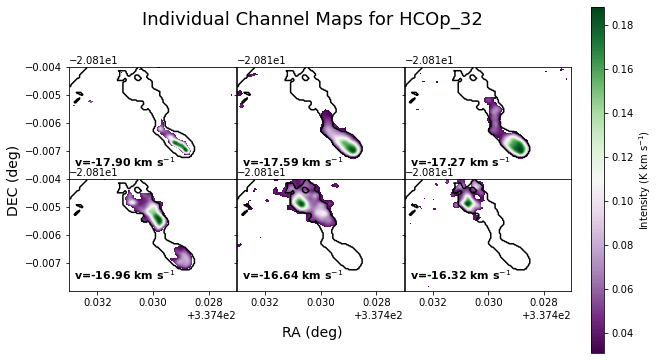

In [96]:
indiv_chan_maps(globule = 'GlobB', source = 'HCOp_32')

# Plotting two (or more) molecules over each other

In [116]:
source = 'GlobB_HCN'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
  
data1 = data[0,:,:,:]
    
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
    
x1 = round(header["CRPIX1"]-(ra_start-337.434)/ra_inc)-1 #Globule B
#x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1 #Globule C
#print(x1)
x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1 #Globule B
#x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 #Globule C
#print(x2)
y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2 #Globule B
#y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1 #Globule C
#print(y1)
y2 = round(header["CRPIX2"]-(dec_start+20.811)/dec_inc)-2 #Globule B
#y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1 #Globule C
#print(y2)
    
data2 = data1[:, :, np.arange(x1, x2)]
data3 = data2[:, np.arange(y1, y2), :]
    
integrated = np.sum(data3[:, :, :], axis = 0)
 
max_val = np.nanmax(integrated)
    
a = [x for x in range(len(data1[:, 0, 0]))]
array = []
for i in range(len(a)):
    if np.nanmax(data3[a[i], :, :]) > 0.25*max_val:
        array.append(a[i])
    
moment0 = np.sum(data3[array, :, :], axis = 0)
    
max_value = np.nanmax(moment0)
min_value = np.nanmin(moment0)
    
extent=[ra[x1],ra[x2],dec[y1],dec[y2]]
ra_x = np.linspace(ra[x1], ra[x2], (x2-x1))
dec_y = np.linspace(dec[y1], dec[y2], (y2-y1))
    
sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
newmask = (moment0 < np.amax(sigma_mask))
    
mom0 = np.ma.array(moment0, mask = newmask)

In [117]:
source2 = 'GlobB_HNC_32'
path2 = source2 + '.image.pbcor.fits'
cube2 = fits.open(path2)
data_2 = cube2[0].data
header2 = cube2[0].header
  
data1_2 = data_2[0,:,:,:]

plt.figure(figsize=[10,20/3]) #Globule B
    
ra_start2 = header2["CRVAL1"]
ra_inc2 = header2["CDELT1"]

channels2 = np.arange(header2["NAXIS1"]) - header2["CRPIX1"]+1

ra2 = ra_start2 + (ra_inc2 * channels2)
ra2 = np.array(ra2, dtype = float)

dec_start2 = header2["CRVAL2"]
dec_inc2 = header2["CDELT2"]

channels1_2 = np.arange(header2["NAXIS2"]) - header2["CRPIX2"]+1

dec2 = dec_start2 + (dec_inc2 * channels1_2)
dec2 = np.array(dec2, dtype = float)
    
x1_2 = round(header2["CRPIX1"]-(ra_start2-337.433)/ra_inc2)-1 #Globule B
#x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1 #Globule C
print(x1_2)
x2_2 = round(header2["CRPIX1"]-(ra_start2-337.427)/ra_inc2)-1 #Globule B
#x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 #Globule C
print(x2_2)
y1_2 = round(header2["CRPIX2"]-(dec_start2+20.818)/dec_inc2)-2 #Globule B
#y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1 #Globule C
#print(y1)
y2_2 = round(header2["CRPIX2"]-(dec_start2+20.8137)/dec_inc2)-2 #Globule B
#y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1 #Globule C
#print(y2)
    
data2_2 = data1_2[:, :, np.arange(x1_2, x2_2)]
data3_2 = data2_2[:, np.arange(y1_2, y2_2), :]
    
integrated2 = np.sum(data3_2[:, :, :], axis = 0)
 
max_val2 = np.nanmax(integrated2)
    
a2 = [x for x in range(len(data1_2[:, 0, 0]))]
array2 = []
for i in range(len(a2)):
    if np.nanmax(data3_2[a2[i], :, :]) > 0.25*max_val2:
        array2.append(a2[i])
    
moment0_2 = np.sum(data3_2[array2, :, :], axis = 0)
    
max_value2 = np.nanmax(moment0_2)
min_value2 = np.nanmin(moment0_2)
    
extent2=[ra2[x1_2],ra2[x2_2],dec2[y1_2],dec2[y2_2]]
ra_x2 = np.linspace(ra2[x1_2], ra2[x2_2], (x2_2-x1_2))
dec_y2 = np.linspace(dec2[y1_2], dec2[y2_2], (y2_2-y1_2))

sigma_mask2 = sigma_clip(moment0_2, sigma=3, maxiters=None, cenfunc='mean')
newmask2 = (moment0_2 < np.amax(sigma_mask2))
    
mom0_2 = np.ma.array(moment0_2, mask = newmask2)
print(newmask2.shape)
    
CS2 = plt.contour(-ra_x2, dec_y2, newmask2, levels = 0, colors = 'xkcd:sky blue', origin = "lower", extent=extent, zorder = 2, label = 'source2')
CS = plt.contour(-ra_x, dec_y, newmask, levels = 0, origin = "lower", extent=extent, zorder = 1, label = 'source')

labels = [source]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

labels2 = [source2]
for i in range(len(labels2)):
    CS2.collections[i].set_label(labels2[i])
    
plt.legend(loc='upper right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
#plt.colorbar(label = r'Integrated Instensity ($\mathrm{K\,kms^{-1}}$)', fraction=0.048, pad=0.04)
plt.title('Contour Comparisons', fontsize= 20)
plt.show()

6
160


Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less


(111, 154)


No contour levels were found within the data range.
The following kwargs were not used by contour: 'label'
No contour levels were found within the data range.
The following kwargs were not used by contour: 'label'


In [8]:
def pos_vel(globule = 'GlobB', source = '13CO'):
    
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    
    data1 = data[0,:,:,:]

    plt.figure(figsize=[8,8]) #Globule B
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - (header["CRPIX1"])+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra*u.deg, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - (header["CRPIX2"])+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
        
    if globule == 'GlobB':
        if source == 'CCH_32':
            main_freq_start = header["CRVAL3"]
            main_freq_inc = header["CDELT3"]
    
            main_freq_channels = np.arange(header["NAXIS3"])

            main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            main_frequency = np.array(main_frequency, dtype = float)
            main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            hfl_velocity = 3e8*(-(main_frequency/262.00452e9)+1)/1000
            hfl_vel_inc = 3e8*(-(header["CDELT3"]/262.00452e9))/1000
            
            #print(hfl_velocity)
        elif source == 'HCN':
            main_freq_start = header["CRVAL3"]
            main_freq_inc = header["CDELT3"]
    
            main_freq_channels = np.arange(header["NAXIS3"])

            main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            main_frequency = np.array(main_frequency, dtype = float)
            main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            #print(header["RESTFRQ"])
            
            hfl1_velocity = 3e8*(-(main_frequency/88.630413e9)+1)/1000
            hfl1_vel_inc = 3e8*(-(header["CDELT3"]/88.630413e9))/1000
            
            hfl2_velocity = 3e8*(-(main_frequency/88.633935e9)+1)/1000
            hfl2_vel_inc = 3e8*(-(header["CDELT3"]/88.633935e9))/1000
            
            #print(hfl1_velocity, hfl2_velocity)
        #elif source == 'HCN_32':
            #main_freq_start = header["CRVAL3"]
            #main_freq_inc = header["CDELT3"]
    
            #main_freq_channels = np.arange(header["NAXIS3"])

            #main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            #main_frequency = np.array(main_frequency, dtype = float)
            #main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            #main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            #hfl1_velocity = 3e8*(-(main_frequency/265.884887)+1)/1000
            #hfl1_vel_inc = 3e8*(-(header["CDELT3"]/265.884887))/1000
            
            #hfl2_velocity = 3e8*(-(main_frequency/265.888519)+1)/1000
            #hfl2_vel_inc = 3e8*(-(header["CDELT3"]/265.888519))/1000
        else:
            freq_start = header["CRVAL3"]
            freq_inc = header["CDELT3"]
    
            freq_channels = np.arange(header["NAXIS3"])

            frequency = freq_start + (freq_inc * freq_channels)
            frequency = np.array(frequency, dtype = float)
            main_velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
            vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
    elif globule == 'GlobC':
        if source == 'CCH_32':
            main_freq_start = header["CRVAL3"]
            main_freq_inc = header["CDELT3"]
    
            main_freq_channels = np.arange(header["NAXIS3"])

            main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            main_frequency = np.array(main_frequency, dtype = float)
            main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            hfl_velocity = 3e8*(-(main_frequency/262.00452e9)+1)/1000
            hfl_vel_inc = 3e8*(-(header["CDELT3"]/262.00452e9))/1000
            
            #print(hfl_velocity)
        elif source == 'HCN':
            main_freq_start = header["CRVAL3"]
            main_freq_inc = header["CDELT3"]
    
            main_freq_channels = np.arange(header["NAXIS3"])

            main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            main_frequency = np.array(main_frequency, dtype = float)
            main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            #print(header["RESTFRQ"])
            
            hfl1_velocity = 3e8*(-(main_frequency/88.630413e9)+1)/1000
            hfl1_vel_inc = 3e8*(-(header["CDELT3"]/88.630413e9))/1000
            
            hfl2_velocity = 3e8*(-(main_frequency/88.633935e9)+1)/1000
            hfl2_vel_inc = 3e8*(-(header["CDELT3"]/88.633935e9))/1000
            
            #print(hfl1_velocity, hfl2_velocity)
        #elif source == 'HCN_32':
            #main_freq_start = header["CRVAL3"]
            #main_freq_inc = header["CDELT3"]
    
            #main_freq_channels = np.arange(header["NAXIS3"])

            #main_frequency = main_freq_start + (main_freq_inc * main_freq_channels)
            #main_frequency = np.array(main_frequency, dtype = float)
            #main_velocity = 3e8*(-(main_frequency/header["RESTFRQ"])+1)/1000
            #main_vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
            
            #hfl1_velocity = 3e8*(-(main_frequency/265.884887)+1)/1000
            #hfl1_vel_inc = 3e8*(-(header["CDELT3"]/265.884887))/1000
            
            #hfl2_velocity = 3e8*(-(main_frequency/265.888519)+1)/1000
            #hfl2_vel_inc = 3e8*(-(header["CDELT3"]/265.888519))/1000
        else:
            freq_start = header["CRVAL3"]
            freq_inc = header["CDELT3"]
    
            freq_channels = np.arange(header["NAXIS3"])

            frequency = freq_start + (freq_inc * freq_channels)
            frequency = np.array(frequency, dtype = float)
            main_velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
            vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
    
    if globule == 'GlobB':
        #figure = plt.figure(figsize=[8, 8])
        x1 = round(header["CRPIX1"]-(ra_start-337.43248)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.8175)/dec_inc)-2
        y2 = round(header["CRPIX2"]-(dec_start+20.81354)/dec_inc)-2
    else:
        #figure = plt.figure(figsize=[8, 8])
        x1 = round(header["CRPIX1"]-(ra_start-337.40975)/ra_inc)-1
        x2 = round(header["CRPIX1"]-(ra_start-337.40565)/ra_inc)-1
        y1 = round(header["CRPIX2"]-(dec_start+20.802)/dec_inc)-1
        y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1
    
    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]

    #integrated = np.sum(data3[:, :, :], axis = 0)*abs(vel_inc)
    
    #plt.imshow(integrated, origin = 'lower')
 
    #max_val = np.nanmax(integrated)
    #print(max_val)
    
    if source == '12CO':
        if globule == 'GlobB':
            main_array = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    elif source == '13CO':
        if globule == 'GlobB':
            main_array = [9, 10, 11, 12, 13, 14, 15, 16, 17]
    elif source == 'C18O':
        if globule == 'GlobB':
            main_array = [9, 10, 11, 12, 13, 14, 15, 16]
    elif source == 'CCH':
        if globule == 'GlobB':
            main_array = [24, 25, 26, 27, 28, 29, 30, 31]
        else:
            main_array = [23, 24, 25, 26, 27, 28]
    elif source == 'CCH_32':
        if globule == 'GlobB':
            main_array = [4, 5, 6, 7, 8, 9, 10]
            hfl_array = [0, 1, 2, 3, 4, 5, 6]
        else:
            main_array = [35, 36, 37, 38, 39, 40]
            hfl_array = [26, 27, 28, 29, 30, 31]
    elif source == 'HC3N':
        if globule == 'GlobB':
            main_array = [13, 14, 15, 16, 17, 18]
        else:
            main_array = [12, 13, 14, 15, 16, 17]
    elif source == 'HCN':
        if globule == 'GlobB':
            main_array = [24, 25, 26, 27, 28, 29, 30, 31, 32]
            hfl2_array = [9, 10, 11, 12, 13, 14, 15, 16, 17]
            hfl1_array = [34, 35, 36, 37, 38, 39, 40, 41, 42]
        else:
            main_array = [23, 24, 25, 26, 27, 28]
            hfl2_array = [8, 9, 10, 11, 12, 13]
            hfl1_array = [33, 34, 35, 36, 37, 38]
    elif source == 'HCN_32':
        if globule == 'GlobB':
            main_array = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
        else:
            main_array = [34, 35, 36, 37, 38, 39, 40, 41]
    elif source == 'HCOp':
        if globule == 'GlobB':
            main_array = [24, 25, 26, 27, 28, 29, 30, 31, 32]
        else:
            main_array = [23, 24, 25, 26, 27, 28]
    elif source == 'HCOp_32':
        if globule == 'GlobB':
            main_array = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
        else:
            main_array = [35, 36, 37, 38, 39, 40, 41, 42]
    elif source == 'HNC':
        if globule == 'GlobB':
            main_array = [2, 3, 4, 5, 6, 7, 8, 9]
        else:
            main_array = [24, 25, 26, 27, 28, 29]
    elif source == 'HNC_32':
        if globule == 'GlobB':
            main_array = [12, 13, 14, 15, 16, 17, 18, 19, 20]
        else:
            main_array = [35, 36, 37, 38, 39, 40, 41]
    
    if source == 'CCH_32':
        main_pv_data = data3[main_array, :, :]
        hfl_pv_data = data3[hfl_array, :, :]
        
        main_integrated = np.nansum(main_pv_data[:, :, :], axis = 2)
        hfl_integrated = np.nansum(hfl_pv_data[:, :, :], axis = 2)
        
        full_pv = main_integrated + hfl_integrated
    elif source == 'HCN':
        main_pv_data = data3[main_array, :, :]
        hfl1_pv_data = data3[hfl1_array, :, :]
        hfl2_pv_data = data3[hfl2_array, :, :]
        
        main_integrated = np.nansum(main_pv_data[:, :, :], axis = 2)
        hfl1_integrated = np.nansum(hfl1_pv_data[:, :, :], axis = 2)
        hfl2_integrated = np.nansum(hfl2_pv_data[:, :, :], axis = 2)
        
        full_pv = main_integrated + hfl2_integrated + hfl1_integrated
        
        #print(full_pv.shape)
    else:
        main_pv_data = data3[main_array, :, :]
        
        full_pv = np.nansum(main_pv_data[:, :, :], axis = 2)
    
    extent = [main_velocity[main_array[0]], main_velocity[main_array[-1]], dec[y1], dec[y2]]
    #extent1 = [hfl_velocity[hfl_array[0]], hfl_velocity[hfl_array[-1]], dec[y1], dec[y2]]
    #extent2 = [hfl1_velocity[hfl1_array[0]], hfl1_velocity[hfl1_array[-1]], dec[y1], dec[y2]]
    #extent3 = [hfl2_velocity[hfl2_array[0]], hfl2_velocity[hfl2_array[-1]], dec[y1], dec[y2]]
    
    tr = scipy.ndimage.rotate(full_pv, 90)
    #print(tr.shape)

    #ax1 = figure.add_subplot(1, 1, 1)
    #ax2 = figure.add_subplot(1, 1, 1)
    #figure = plt.figure(figsize=[8, 8])
    figure, ax = plt.subplots(figsize = [10, 8])
    
    levels = np.linspace(0, np.nanmax(full_pv), 10)
    ax.contour(tr, levels = levels[1:10], colors = 'green', origin = 'upper', extent = extent)
    pv = ax.imshow(tr, aspect = 'auto', vmin = 0, origin = 'upper', cmap = 'afmhot', extent = extent)
    #plt.text(25, 10, 'source')
    
    #print(y2-y1)
    
    if globule == 'GlobB':
        dec_val4 = np.abs(dec + 20.8141667).argmin()
        dec_val3 = np.abs(dec + 20.815).argmin()
        dec_val2 = np.abs(dec + 20.81583).argmin()
        dec_val1 = np.abs(dec + 20.81667).argmin()
        print(dec_val4, dec_val3)
        plt.xticks([-18.5, -17.5, -16.5, -15.5], fontsize = 18)
        ax.set_yticklabels(['49′ 00″','57″','54″','-20° 48′ 51″'], fontsize = 18)
    elif globule == 'GlobC':
        dec_val4 = np.abs(dec + 20.79722).argmin()
        dec_val3 = np.abs(dec + 20.79861).argmin()
        dec_val2 = np.abs(dec + 20.80000).argmin()
        dec_val1 = np.abs(dec + 20.801389).argmin()
        print(dec_val4, dec_val3)
        plt.xticks([-29.5, -29, -28.5, -28, -27.5, -27, -26.5, -26, -25.5, -25], fontsize = 18)
        ax.set_yticklabels(['05″','48′ 00″','55″','-20° 47′ 50″'], fontsize = 18)
        
    ax.set_yticks([dec[dec_val1], dec[dec_val2], dec[dec_val3], dec[dec_val4]])

    plt.xlim(main_velocity[main_array[0]], main_velocity[main_array[-1]])
    plt.ylim(dec[y1], dec[y2])
    plt.xlabel('Velocity (km/s)',fontsize=20)
    plt.ylabel('Dec',fontsize=20)
    #plt.legend(loc='upper right')
    cbar = figure.colorbar(pv)
    figure.text(0.9, 0.5, r'Instensity ($\mathrm{Jy\,beam^{-1}}$)', fontsize=20, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
    
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(18)
    #plt.colorbar(label = r'Integrated Instensity ($\mathrm{K\,kms^{-1}}$)', fraction=0.05, pad=0.04)
    #plt.title(globule + ' ' + source + ' Position Velocity Diagram', fontsize= 20)
    #plt.savefig(globule + source + ' PV_June24.png', bbox_inches='tight')

In [9]:
#pos_vel(globule = 'GlobB', source = '12CO')
#pos_vel(globule = 'GlobB', source = '13CO')
#pos_vel(globule = 'GlobB', source = 'C18O')
#pos_vel(globule = 'GlobB', source = 'CCH')
#pos_vel(globule = 'GlobB', source = 'HC3N')
#pos_vel(globule = 'GlobB', source = 'HCOp')
#pos_vel(globule = 'GlobB', source = 'HCOp_32')
#pos_vel(globule = 'GlobB', source = 'HNC')
#pos_vel(globule = 'GlobB', source = 'HNC_32')

#pos_vel(globule = 'GlobB', source = 'CCH_32')
#pos_vel(globule = 'GlobB', source = 'HCN')
#pos_vel(globule = 'GlobB', source = 'HCN_32')

#pos_vel(globule = 'GlobC', source = 'CCH')
pos_vel(globule = 'GlobC', source = 'CCH_32')
#pos_vel(globule = 'GlobC', source = 'HC3N')
#pos_vel(globule = 'GlobC', source = 'HCN')
#pos_vel(globule = 'GlobC', source = 'HCN_32')
#pos_vel(globule = 'GlobC', source = 'HCOp')
#pos_vel(globule = 'GlobC', source = 'HCOp_32')
#pos_vel(globule = 'GlobC', source = 'HNC')
#pos_vel(globule = 'GlobC', source = 'HNC_32')

218 176


<Figure size 576x576 with 0 Axes>

In [151]:
globule = 'GlobB'
source = '13CO'

path = globule + '_' + source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
    
data1 = data[0,:,:,:]

plt.figure(figsize=[8,8]) #Globule B
    
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - (header["CRPIX1"])+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - (header["CRPIX2"])+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
    
freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]
    
freq_channels = np.arange(header["NAXIS3"])
    
frequency = freq_start + (freq_inc * freq_channels)
frequency = np.array(frequency, dtype = float)
velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000

integrated = np.nansum(data1[:, :, :], axis = 2)
print(integrated.shape)

plt.imshow(integrated, aspect = 'auto')

(32, 250)
